In [1]:
import pandas as pd
df = pd.read_csv('hotels_dataset.csv')
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,Hotel,8.1,Very good,4912.0,4910.0,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,Hotel,7.8,Good,4463.0,NaN,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,Hotel,8.2,Very good,8159.0,7711.0,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,Hotel,5.8,Average,2455.0,1875.0,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,Resort,8.0,Very good,4650.0,4649.0,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,Hotel,8.0,Very good,2495.0,2101.0,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",Hotel,7.8,Good,746.0,NaN,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,Hotel,8.2,Very good,4035.0,3484.0,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,Resort,8.5,Excellent,4133.0,3807.0,Amenities not found for this item.,Additional info not found for this item.,Margao


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
dff=df.copy()

In [4]:
df.isnull().sum()

Property Name              0
Property Type              0
Rating                     0
Aggregate Rating           0
Price                      1
Best Prices               31
Amenities                  0
Additional Information     0
Location                   0
dtype: int64

In [5]:
df.isnull().mean()*100

Property Name              0.000000
Property Type              0.000000
Rating                     0.000000
Aggregate Rating           0.000000
Price                      0.952381
Best Prices               29.523810
Amenities                  0.000000
Additional Information     0.000000
Location                   0.000000
dtype: float64

In [6]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,Hotel,8.1,Very good,4912.0,4910.0,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,Hotel,7.8,Good,4463.0,NaN,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,Hotel,8.2,Very good,8159.0,7711.0,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,Hotel,5.8,Average,2455.0,1875.0,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,Resort,8.0,Very good,4650.0,4649.0,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,Hotel,8.0,Very good,2495.0,2101.0,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",Hotel,7.8,Good,746.0,NaN,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,Hotel,8.2,Very good,4035.0,3484.0,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,Resort,8.5,Excellent,4133.0,3807.0,Amenities not found for this item.,Additional info not found for this item.,Margao


In [7]:
l = [col for col in df.columns if df[col].isnull().mean()<0.05 and df[col].isnull().mean()>0]
l

['Price']

In [8]:
df.dropna(subset=l, inplace=True)

In [9]:
df['Property Type'].fillna(df['Property Type'].mode()[0], inplace=True)
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,Hotel,8.1,Very good,4912.0,4910.0,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,Hotel,7.8,Good,4463.0,NaN,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,Hotel,8.2,Very good,8159.0,7711.0,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,Hotel,5.8,Average,2455.0,1875.0,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,Resort,8.0,Very good,4650.0,4649.0,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,Hotel,8.0,Very good,2495.0,2101.0,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",Hotel,7.8,Good,746.0,NaN,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,Hotel,8.2,Very good,4035.0,3484.0,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,Resort,8.5,Excellent,4133.0,3807.0,Amenities not found for this item.,Additional info not found for this item.,Margao


In [10]:
imp=SimpleImputer(strategy="most_frequent")


In [11]:
tr=ColumnTransformer([
                    ('Mode1',imp,['Property Type'])],
                     remainder='passthrough')

In [12]:
X = df.iloc[:,0:3]
y = df.iloc[:,-1]

In [13]:
tr.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Mode1',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['Property Type'])])

In [14]:
X=tr.fit_transform(X)
X

array([['Hotel', 'ibis Styles Goa Calangute', 8.1],
       ['Hotel', 'ACRON CANDOLIM REGINA', 7.8],
       ['Hotel', 'Novotel Goa Resort and Spa', 8.2],
       ['Hotel', 'The Byke Old Anchor Beach Resort', 5.8],
       ['Resort', 'Fairfield By Marriott Goa Anjuna', 8.0],
       ['Resort', 'Ramada By Wyndham Goa Vagator', 8.5],
       ['Hotel', 'Royal Orchid Beach Resort & Spa', 6.8],
       ['Hotel', 'Azaya Beach Resort Goa', 7.8],
       ['Hotel', 'The Baga Beach Resort', 7.6],
       ['Resort', 'Heritage Village Resort & Spa Goa', 8.6],
       ['Hotel', 'Hard Rock Hotel Goa', 8.1],
       ['Resort', 'Doubletree By Hilton Goa - Panaji', 8.8],
       ['Hotel', 'Whispering Palms Beach', 7.7],
       ['Hotel', 'The Sequeira Goa', 6.3],
       ['Hotel', 'Country Inn & Suites By Carlson', 8.0],
       ['Hotel', 'Beleza By The Beach', 8.6],
       ['Hotel', 'Planet Hollywood Goa Beach Resort', 8.2],
       ['Hotel', 'Hilton Goa Resort', 7.8],
       ['Resort', 'Le Méridien Goa, Calangute', 

Text(0.5, 1.0, 'Best Prices')

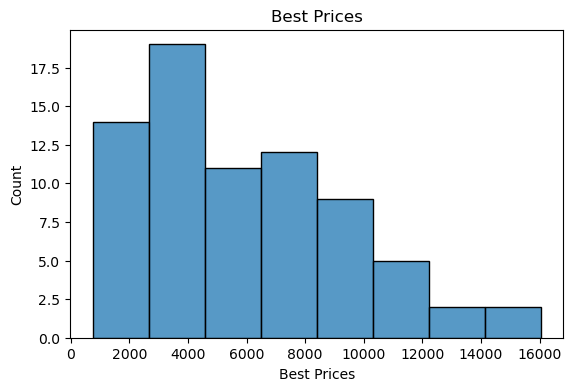

In [15]:
plt.figure(figsize=(14,4))

plt.subplot(121)
sns.histplot(df['Best Prices'])
plt.title('Best Prices')

In [16]:
df['Best Prices'].fillna(df['Best Prices'].mean(),inplace=True)

In [17]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,Hotel,8.1,Very good,4912.0,4910.00000,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,Hotel,7.8,Good,4463.0,5958.72973,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,Hotel,8.2,Very good,8159.0,7711.00000,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,Hotel,5.8,Average,2455.0,1875.00000,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,Resort,8.0,Very good,4650.0,4649.00000,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,Hotel,8.0,Very good,2495.0,2101.00000,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",Hotel,7.8,Good,746.0,5958.72973,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,Hotel,8.2,Very good,4035.0,3484.00000,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,Resort,8.5,Excellent,4133.0,3807.00000,Amenities not found for this item.,Additional info not found for this item.,Margao


In [18]:
df['Property Type'].unique()

array(['Hotel', 'Resort'], dtype=object)

In [19]:
print("Length of DataFrame:", len(df))
print("Length of 'Property Type' column:", len(df['Property Type']))


Length of DataFrame: 104
Length of 'Property Type' column: 104


In [20]:
print(df['Property Type'].value_counts())


Property Type
Hotel     79
Resort    25
Name: count, dtype: int64


In [21]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Hotel', 'Resort']])
df['Property Type']= encoder.fit_transform(df[['Property Type']])

df['Property Type'].unique()

array([0., 1.])

In [22]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,0.0,8.1,Very good,4912.0,4910.00000,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,0.0,7.8,Good,4463.0,5958.72973,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,0.0,8.2,Very good,8159.0,7711.00000,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,0.0,5.8,Average,2455.0,1875.00000,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,Very good,4650.0,4649.00000,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,Very good,2495.0,2101.00000,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",0.0,7.8,Good,746.0,5958.72973,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,0.0,8.2,Very good,4035.0,3484.00000,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,1.0,8.5,Excellent,4133.0,3807.00000,Amenities not found for this item.,Additional info not found for this item.,Margao


In [23]:
df.isnull().sum()

Property Name             0
Property Type             0
Rating                    0
Aggregate Rating          0
Price                     0
Best Prices               0
Amenities                 0
Additional Information    0
Location                  0
dtype: int64

In [24]:
df['Aggregate Rating'].fillna(df['Aggregate Rating'].mode()[0], inplace=True)
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,0.0,8.1,Very good,4912.0,4910.00000,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,0.0,7.8,Good,4463.0,5958.72973,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,0.0,8.2,Very good,8159.0,7711.00000,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,0.0,5.8,Average,2455.0,1875.00000,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,Very good,4650.0,4649.00000,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,Very good,2495.0,2101.00000,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",0.0,7.8,Good,746.0,5958.72973,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,0.0,8.2,Very good,4035.0,3484.00000,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,1.0,8.5,Excellent,4133.0,3807.00000,Amenities not found for this item.,Additional info not found for this item.,Margao


In [25]:
# Get the unique values in the 'Aggregate Rating' column and convert it to a list
categories = df['Aggregate Rating'].unique().tolist()

# Initialize OrdinalEncoder with defined categories
encoder = OrdinalEncoder(categories=[categories])

# Convert qualitative ratings to numerical categories
ratings_encoded = encoder.fit_transform(df[['Aggregate Rating']])

# Assign encoded ratings back to the DataFrame
df['Aggregate Rating'] = ratings_encoded

# Check the unique encoded values
print(df['Aggregate Rating'].unique())


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]


In [26]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location
0,ibis Styles Goa Calangute,0.0,8.1,0.0,4912.0,4910.00000,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute
1,ACRON CANDOLIM REGINA,0.0,7.8,1.0,4463.0,5958.72973,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim
2,Novotel Goa Resort and Spa,0.0,8.2,2.0,8159.0,7711.00000,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim
3,The Byke Old Anchor Beach Resort,0.0,5.8,3.0,2455.0,1875.00000,Amenities not found for this item.,Additional info not found for this item.,Cavelossim
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,0.0,4650.0,4649.00000,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,2.0,2495.0,2101.00000,Amenities not found for this item.,Additional info not found for this item.,Margao
101,"Swati Hotel, Arambol, Goa",0.0,7.8,5.0,746.0,5958.72973,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem
102,The Fern Residency Miramar,0.0,8.2,2.0,4035.0,3484.00000,Amenities not found for this item.,Additional info not found for this item.,Panaji
103,Hotel Nanutel,1.0,8.5,4.0,4133.0,3807.00000,Amenities not found for this item.,Additional info not found for this item.,Margao


In [27]:
location_frequency = df['Location'].value_counts(normalize=True)

# Map the frequency values to the corresponding categories
df['Location_Frequency_Encoded'] = df['Location'].map(location_frequency)
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Amenities,Additional Information,Location,Location_Frequency_Encoded
0,ibis Styles Goa Calangute,0.0,8.1,0.0,4912.0,4910.00000,Amenities not found for this item.,"Friendly Staff, Convenient Amenities",Calangute,0.163462
1,ACRON CANDOLIM REGINA,0.0,7.8,1.0,4463.0,5958.72973,Amenities not found for this item.,"Tasty Breakfast, Modern Amenities",Candolim,0.192308
2,Novotel Goa Resort and Spa,0.0,8.2,2.0,8159.0,7711.00000,Amenities not found for this item.,"Recreation And Relaxation, Tasty Food",Candolim,0.192308
3,The Byke Old Anchor Beach Resort,0.0,5.8,3.0,2455.0,1875.00000,Amenities not found for this item.,Additional info not found for this item.,Cavelossim,0.009615
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,0.0,4650.0,4649.00000,Amenities not found for this item.,"Fitness Facilities, Good Service",Anjuna,0.086538
...,...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,2.0,2495.0,2101.00000,Amenities not found for this item.,Additional info not found for this item.,Margao,0.076923
101,"Swati Hotel, Arambol, Goa",0.0,7.8,5.0,746.0,5958.72973,Amenities not found for this item.,"Convenient Services, Relaxing Atmosphere",Pernem,0.028846
102,The Fern Residency Miramar,0.0,8.2,2.0,4035.0,3484.00000,Amenities not found for this item.,Additional info not found for this item.,Panaji,0.115385
103,Hotel Nanutel,1.0,8.5,4.0,4133.0,3807.00000,Amenities not found for this item.,Additional info not found for this item.,Margao,0.076923


In [28]:
df.drop(columns=['Amenities'], inplace=True)


In [29]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Additional Information,Location,Location_Frequency_Encoded
0,ibis Styles Goa Calangute,0.0,8.1,0.0,4912.0,4910.00000,"Friendly Staff, Convenient Amenities",Calangute,0.163462
1,ACRON CANDOLIM REGINA,0.0,7.8,1.0,4463.0,5958.72973,"Tasty Breakfast, Modern Amenities",Candolim,0.192308
2,Novotel Goa Resort and Spa,0.0,8.2,2.0,8159.0,7711.00000,"Recreation And Relaxation, Tasty Food",Candolim,0.192308
3,The Byke Old Anchor Beach Resort,0.0,5.8,3.0,2455.0,1875.00000,Additional info not found for this item.,Cavelossim,0.009615
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,0.0,4650.0,4649.00000,"Fitness Facilities, Good Service",Anjuna,0.086538
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,2.0,2495.0,2101.00000,Additional info not found for this item.,Margao,0.076923
101,"Swati Hotel, Arambol, Goa",0.0,7.8,5.0,746.0,5958.72973,"Convenient Services, Relaxing Atmosphere",Pernem,0.028846
102,The Fern Residency Miramar,0.0,8.2,2.0,4035.0,3484.00000,Additional info not found for this item.,Panaji,0.115385
103,Hotel Nanutel,1.0,8.5,4.0,4133.0,3807.00000,Additional info not found for this item.,Margao,0.076923


In [30]:
df['Discount'] = ((df['Price'] - df['Best Prices']) / df['Price']) * 100


In [31]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Additional Information,Location,Location_Frequency_Encoded,Discount
0,ibis Styles Goa Calangute,0.0,8.1,0.0,4912.0,4910.00000,"Friendly Staff, Convenient Amenities",Calangute,0.163462,0.040717
1,ACRON CANDOLIM REGINA,0.0,7.8,1.0,4463.0,5958.72973,"Tasty Breakfast, Modern Amenities",Candolim,0.192308,-33.513998
2,Novotel Goa Resort and Spa,0.0,8.2,2.0,8159.0,7711.00000,"Recreation And Relaxation, Tasty Food",Candolim,0.192308,5.490869
3,The Byke Old Anchor Beach Resort,0.0,5.8,3.0,2455.0,1875.00000,Additional info not found for this item.,Cavelossim,0.009615,23.625255
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,0.0,4650.0,4649.00000,"Fitness Facilities, Good Service",Anjuna,0.086538,0.021505
...,...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,2.0,2495.0,2101.00000,Additional info not found for this item.,Margao,0.076923,15.791583
101,"Swati Hotel, Arambol, Goa",0.0,7.8,5.0,746.0,5958.72973,"Convenient Services, Relaxing Atmosphere",Pernem,0.028846,-698.757336
102,The Fern Residency Miramar,0.0,8.2,2.0,4035.0,3484.00000,Additional info not found for this item.,Panaji,0.115385,13.655514
103,Hotel Nanutel,1.0,8.5,4.0,4133.0,3807.00000,Additional info not found for this item.,Margao,0.076923,7.887733


In [32]:
wdf.drop(columns=['Additional Information'], inplace=True)

In [33]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Location,Location_Frequency_Encoded,Discount
0,ibis Styles Goa Calangute,0.0,8.1,0.0,4912.0,4910.00000,Calangute,0.163462,0.040717
1,ACRON CANDOLIM REGINA,0.0,7.8,1.0,4463.0,5958.72973,Candolim,0.192308,-33.513998
2,Novotel Goa Resort and Spa,0.0,8.2,2.0,8159.0,7711.00000,Candolim,0.192308,5.490869
3,The Byke Old Anchor Beach Resort,0.0,5.8,3.0,2455.0,1875.00000,Cavelossim,0.009615,23.625255
4,Fairfield By Marriott Goa Anjuna,1.0,8.0,0.0,4650.0,4649.00000,Anjuna,0.086538,0.021505
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,8.0,2.0,2495.0,2101.00000,Margao,0.076923,15.791583
101,"Swati Hotel, Arambol, Goa",0.0,7.8,5.0,746.0,5958.72973,Pernem,0.028846,-698.757336
102,The Fern Residency Miramar,0.0,8.2,2.0,4035.0,3484.00000,Panaji,0.115385,13.655514
103,Hotel Nanutel,1.0,8.5,4.0,4133.0,3807.00000,Margao,0.076923,7.887733


In [34]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the columns to be scaled
columns_to_scale = ['Rating', 'Aggregate Rating', 'Price', 'Best Prices', 'Location_Frequency_Encoded', 'Discount']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the scaled dataset
print(df.head())

                      Property Name  Property Type    Rating  \
0         ibis Styles Goa Calangute            0.0  0.171563   
1             ACRON CANDOLIM REGINA            0.0 -0.171563   
2        Novotel Goa Resort and Spa            0.0  0.285939   
3  The Byke Old Anchor Beach Resort            0.0 -2.459074   
4  Fairfield By Marriott Goa Anjuna            1.0  0.057188   

   Aggregate Rating     Price   Best Prices    Location  \
0         -1.529665 -0.444566 -3.549830e-01   Calangute   
1         -1.165626 -0.563642 -6.157071e-16    Candolim   
2         -0.801587  0.416546  5.931234e-01    Candolim   
3         -0.437547 -1.096168 -1.382296e+00  Cavelossim   
4         -1.529665 -0.514049 -4.433285e-01      Anjuna   

   Location_Frequency_Encoded  Discount  
0                    0.946924  0.088750  
1                    1.395922 -0.283748  
2                    1.395922  0.149253  
3                   -1.447729  0.350567  
4                   -0.250402  0.088536  


In [35]:
df

,Property Name,Property Type,Rating,Aggregate Rating,Price,Best Prices,Location,Location_Frequency_Encoded,Discount
0,ibis Styles Goa Calangute,0.0,0.171563,-1.529665,-0.444566,-3.549830e-01,Calangute,0.946924,0.088750
1,ACRON CANDOLIM REGINA,0.0,-0.171563,-1.165626,-0.563642,-6.157071e-16,Candolim,1.395922,-0.283748
2,Novotel Goa Resort and Spa,0.0,0.285939,-0.801587,0.416546,5.931234e-01,Candolim,1.395922,0.149253
3,The Byke Old Anchor Beach Resort,0.0,-2.459074,-0.437547,-1.096168,-1.382296e+00,Cavelossim,-1.447729,0.350567
4,Fairfield By Marriott Goa Anjuna,1.0,0.057188,-1.529665,-0.514049,-4.433285e-01,Anjuna,-0.250402,0.088536
...,...,...,...,...,...,...,...,...,...
100,Viva,0.0,0.057188,-0.801587,-1.085560,-1.305797e+00,Margao,-0.400068,0.263603
101,"Swati Hotel, Arambol, Goa",0.0,-0.171563,0.290531,-1.549399,-6.157071e-16,Pernem,-1.148398,-7.668750
102,The Fern Residency Miramar,0.0,0.285939,-0.801587,-0.677149,-8.376676e-01,Panaji,0.198595,0.239890
103,Hotel Nanutel,1.0,0.629065,-0.073508,-0.651159,-7.283358e-01,Margao,-0.400068,0.175861


In [36]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [37]:
print(df.columns)

Index(['Property Name', 'Property Type', 'Rating', 'Aggregate Rating', 'Price',
       'Best Prices', 'Location', 'Location_Frequency_Encoded', 'Discount'],
      dtype='object')


# KNN

In [38]:
df.drop(columns=['Property Name'], inplace=True)
df.drop(columns=['Location'], inplace=True)

In [39]:
df

,Property Type,Rating,Aggregate Rating,Price,Best Prices,Location_Frequency_Encoded,Discount
0,0.0,0.171563,-1.529665,-0.444566,-3.549830e-01,0.946924,0.088750
1,0.0,-0.171563,-1.165626,-0.563642,-6.157071e-16,1.395922,-0.283748
2,0.0,0.285939,-0.801587,0.416546,5.931234e-01,1.395922,0.149253
3,0.0,-2.459074,-0.437547,-1.096168,-1.382296e+00,-1.447729,0.350567
4,1.0,0.057188,-1.529665,-0.514049,-4.433285e-01,-0.250402,0.088536
...,...,...,...,...,...,...,...
100,0.0,0.057188,-0.801587,-1.085560,-1.305797e+00,-0.400068,0.263603
101,0.0,-0.171563,0.290531,-1.549399,-6.157071e-16,-1.148398,-7.668750
102,0.0,0.285939,-0.801587,-0.677149,-8.376676e-01,0.198595,0.239890
103,1.0,0.629065,-0.073508,-0.651159,-7.283358e-01,-0.400068,0.175861


In [40]:
df.shape

(104, 7)

In [41]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [42]:
y.unique()

array([0., 1.])

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [44]:
X_train.head()

,Rating,Aggregate Rating,Price,Best Prices,Location_Frequency_Encoded,Discount
11,0.972192,0.654571,0.751497,7.894467e-01,0.198595,0.221555
89,0.057188,-0.801587,-0.759627,-6.157071e-16,-0.250402,-0.577873
62,-2.001572,-0.437547,-1.135153,-6.157071e-16,-0.549734,-1.667660
74,-0.743441,-0.437547,-0.960650,-1.079687e+00,1.395922,0.162031
5,0.629065,-0.073508,0.183168,-6.157071e-16,-0.250402,0.289652


In [45]:
X_train.shape

(83, 6)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train

array([[ 0.9203269 ,  0.64093121,  0.79482526,  0.85038399,  0.24565369,
         0.2191171 ],
       [ 0.01633716, -0.83677131, -0.72511057,  0.052241  , -0.22127585,
        -0.55146207],
       [-2.01763975, -0.46734568, -1.10282716,  0.052241  , -0.53256221,
        -1.60192271],
       [-0.77465386, -0.46734568, -0.92730631, -1.03933937,  1.49079913,
         0.16174175],
       [ 0.58133075, -0.09792005,  0.22318214,  0.052241  , -0.22127585,
         0.2847573 ],
       [ 1.93731536,  1.01035684,  0.71826829,  1.08856716,  1.49079913,
         0.10800546],
       [ 0.2423346 , -0.83677131, -0.64215163, -0.79465407,  0.24565369,
         0.23679122],
       [ 1.25932305, -0.09792005, -1.12763481,  0.052241  , -0.53256221,
        -1.71791668],
       [ 0.80732818, -0.09792005,  2.85626156,  3.50564722, -1.15513492,
         0.15930258],
       [ 0.35533332, -0.83677131, -0.82194046, -0.92469661, -0.22127585,
         0.17249149],
       [-0.20966027, -1.20619694, -0.52798305,  0.

In [48]:
X_train.shape

(83, 6)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.7619047619047619

In [52]:
y_train

11    1.0
89    0.0
62    0.0
74    1.0
5     1.0
     ... 
43    0.0
22    0.0
73    0.0
15    0.0
40    0.0
Name: Property Type, Length: 83, dtype: float64

In [53]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

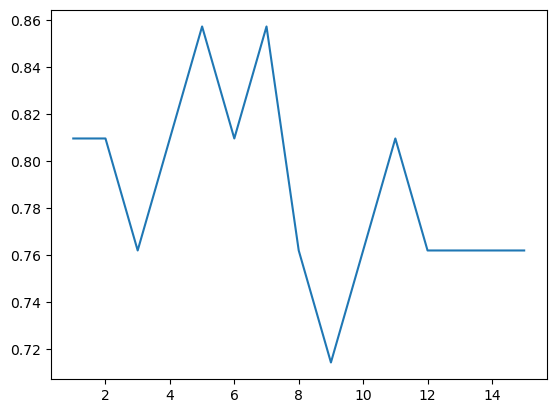

In [54]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)

In [55]:
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
y_trans=label_encoder.fit_transform(y_train) 

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn.fit(X_train2,y_trans)

KNeighborsClassifier(n_neighbors=15)

In [57]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


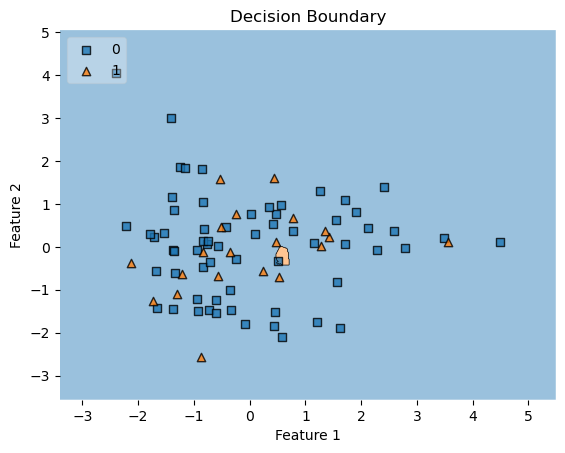

In [58]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions  # Install mlxtend library if not installed

# Visualize decision boundary for a 2D dataset

plot_decision_regions(X_train2, y_trans, clf=knn, legend=2)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary")
plt.show()

# Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2

In [61]:
clf = LogisticRegression()

In [62]:
pipe = Pipeline([
    ('clf',clf)
])

In [63]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('clf', LogisticRegression())])

In [64]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [65]:
# Predict
y_pred = pipe.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7619047619047619

# Cross Validation

In [67]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.7470588235294118

# Grid Search CV

In [68]:
# gridsearchcv
param_grid = {
    "clf__penalty": ['l1', 'l2'],
    "clf__C": [0.001, 0.01, 0.1, 1, 10, 100]
}

In [69]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/home/diya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diya/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/diya/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
 

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__penalty': ['l1', 'l2']},
             scoring='accuracy')

In [70]:
grid.best_score_

0.7588235294117647

In [71]:
grid.best_params_

{'clf__C': 0.001, 'clf__penalty': 'l2'}

# Export to a pickle file

In [72]:
# export 
import pickle
pickle.dump(pipe,open('lr_pile.pkl','wb'))

# Random Forest


In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [77]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
rf = RandomForestRegressor(oob_score=True)
rf.fit(X_train, y_train)

# Get the out-of-bag score
rf.oob_score_

0.44407300162749097

In [82]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.016720605598622634


# Testing with multiple models

In [83]:
rf = RandomForestClassifier()
svc = SVC()
lr = LogisticRegression()

In [85]:
# Initialize and fit the RandomForestRegressor model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the performance of the regression model using appropriate metrics
# For example, you can calculate the mean squared error (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.014002850060311914


In [92]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the RandomForestRegressor model
rf = RandomForestRegressor(max_samples=0.75, random_state=42)
rf.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf.predict(X_test)

# Now you can evaluate the performance of the regression model using appropriate metrics


In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Perform cross-validation with RandomForestRegressor
np.mean(cross_val_score(RandomForestRegressor(max_samples=0.75), X, y, cv=10, scoring='neg_mean_squared_error'))


-0.5865336105780168

# Grid Search CV

In [96]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [97]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [98]:
rf = RandomForestRegressor()

In [99]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [100]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [101]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}

In [102]:
rf_grid.best_score_

0.5911837456533983

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estim

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.6, max_samples=0.75, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=1.0, n_

[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.5, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=0.75, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=0.2, max_samples=1.0, n_estimators=120; total time=   0.2s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=0.6, max_samples=0.5, n_esti

# Naive Bayes

In [103]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [105]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [106]:
# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [107]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [109]:
from sklearn.naive_bayes import MultinomialNB
# Initialize Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [110]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9555555555555556


# SVM

In [111]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [112]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [113]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
# Create SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC()

In [115]:
# Predict using the trained model
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [116]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

# Comparing Multiple Models using AUC-ROC Curve

In [121]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model to your training data
lr.fit(X_train, y_train)

# Now you can use the predict_proba method
y_scores = lr.predict_proba(X_test)[:, 1]


In [126]:
y_pred = model.predict(X_test)
y_true = y_test  # Assuming y_test contains the true labels corresponding to X_test


In [128]:
class_names = np.unique(np.concatenate((y_true, y_pred)))


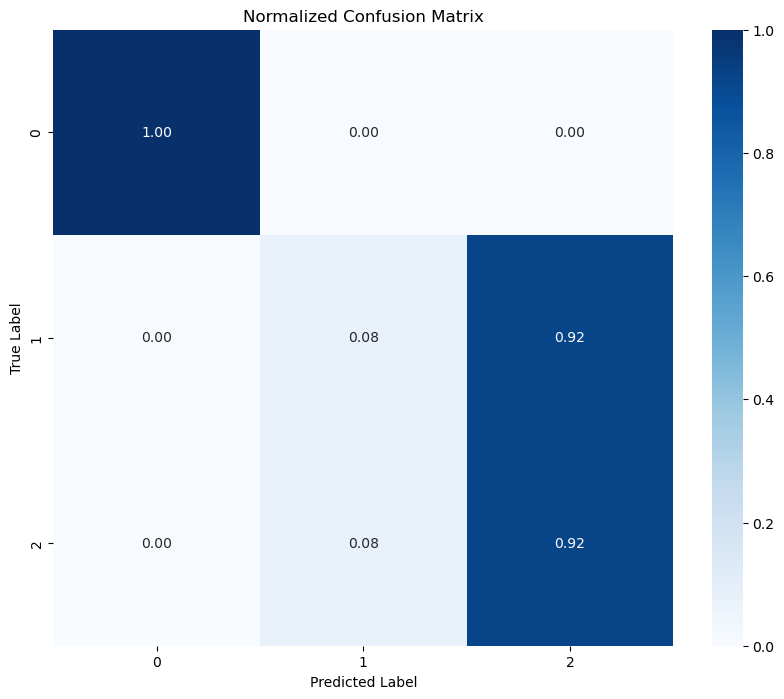

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true contains true labels and y_pred contains predicted labels
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Blues', fmt='.2f', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix')
plt.show()


In [137]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have a logistic regression classifier 'lr' and test data 'X_test', and labels 'y_test'
# Create an instance of OneVsRestClassifier
ovr = OneVsRestClassifier(LogisticRegression())

# Fit the classifier
ovr.fit(X_train, y_train)

# Predict probabilities for each class using OneVsRestClassifier
y_scores_ovr = ovr.predict_proba(X_test)

# Now you can compute ROC curve and ROC area for each class and plot them as needed


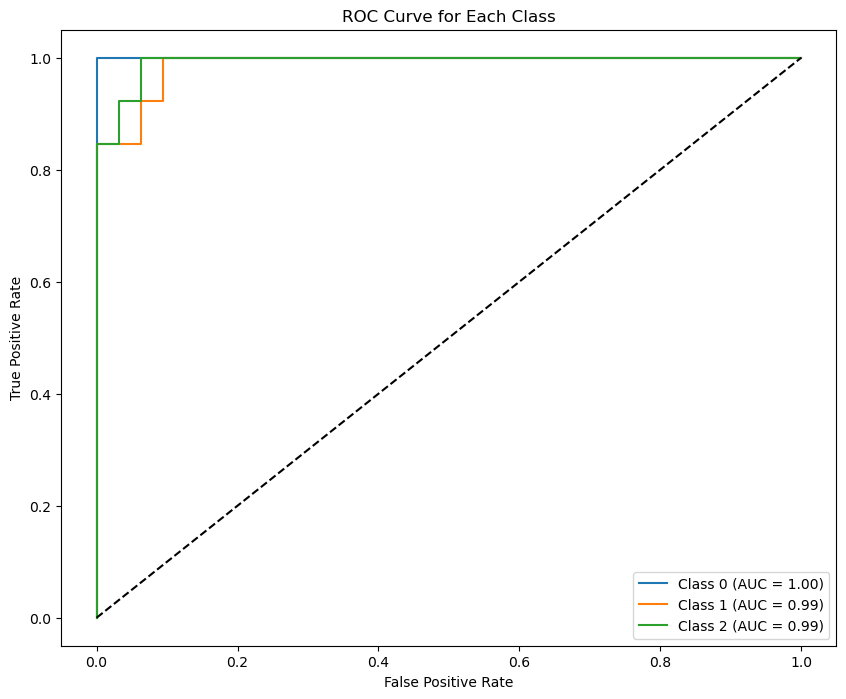

In [141]:
n_classes = len(np.unique(y_test))
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming you have a logistic regression classifier 'lr' and test data 'X_test', and labels 'y_test'
# Create an instance of OneVsRestClassifier
ovr = OneVsRestClassifier(LogisticRegression())

# Fit the classifier
ovr.fit(X_train, y_train)

# Predict probabilities for each class using OneVsRestClassifier
y_scores_ovr = ovr.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Define the number of classes
n_classes = len(np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()
